In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')




In [156]:
train = pd.read_csv('/Users/javadzabihi/Downloads/IS 733 Project/train.csv')
test = pd.read_csv('/Users/javadzabihi/Downloads/IS 733 Project/test.csv')



In [157]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [158]:
train.select_dtypes(exclude = ["object"]).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [159]:
train.select_dtypes(include = ["object"]).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# Visualization

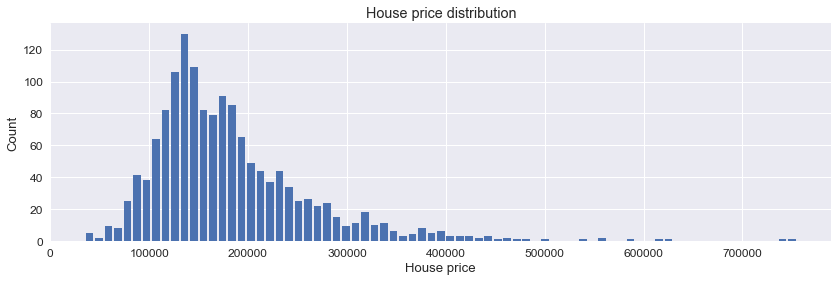

In [160]:
sns.set(font_scale=1.2)
train.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('House price distribution')
plt.xlabel('House price')
plt.ylabel('Count')
plt.savefig('House_price_distribution.png')
plt.show()

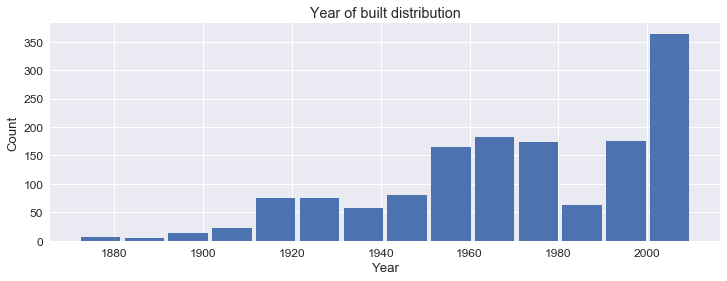

In [161]:
sns.set(font_scale=1.2)
train.YearBuilt.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('Year of built distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.savefig('year_built.png')
plt.show()

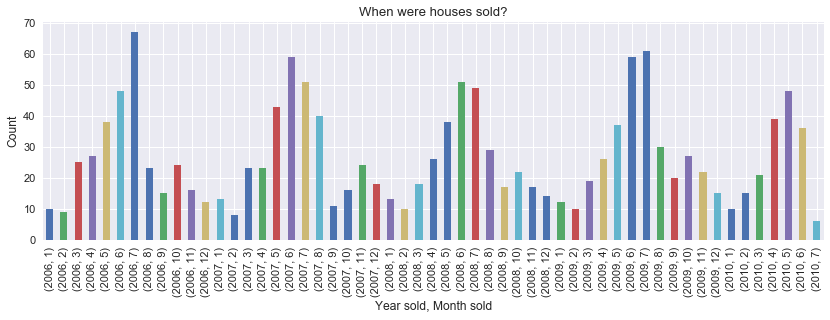

In [162]:
sns.set(font_scale=1.1)
train.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar', figsize=(14,4))
plt.title('When were houses sold?')
plt.xlabel('Year sold, Month sold')
plt.ylabel('Count')
plt.savefig('seasonality.png', bbox_inches='tight')
plt.show()

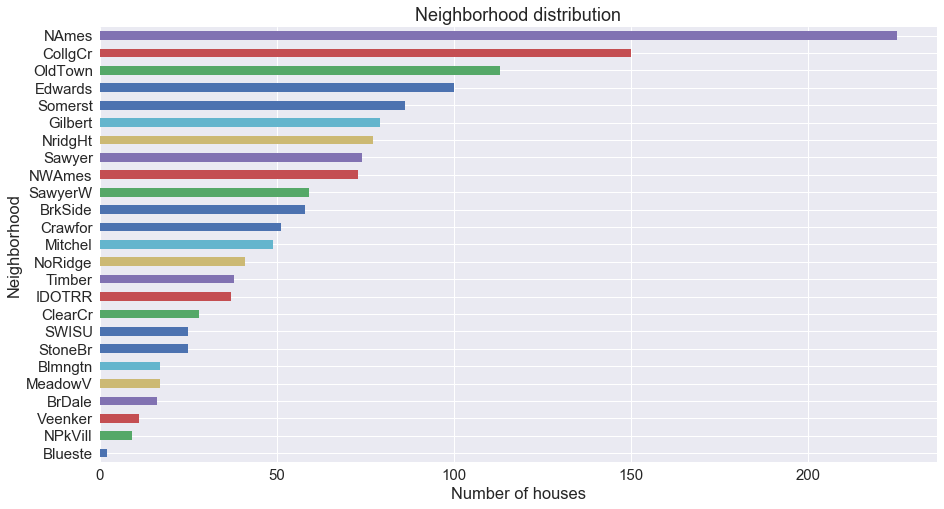

In [163]:
sns.set(font_scale=1.5)
train.groupby('Neighborhood').Id.count().\
    sort_values().\
    plot(kind='barh', figsize=(15,8))
plt.title('Neighborhood distribution')
plt.xlabel('Number of houses')
plt.savefig('Neighborhood_distribution.png')
plt.show()

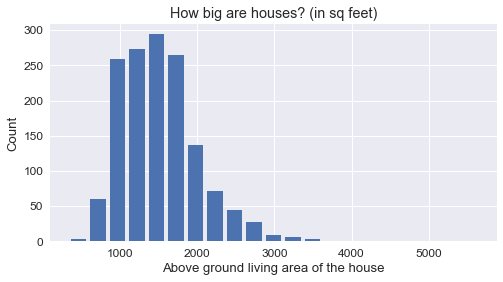

In [164]:
sns.set(font_scale=1.2)
train.GrLivArea.hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('How big are houses? (in sq feet)')
plt.xlabel('Above ground living area of the house')
plt.ylabel('Count')
plt.savefig('house_size.png')
plt.show()

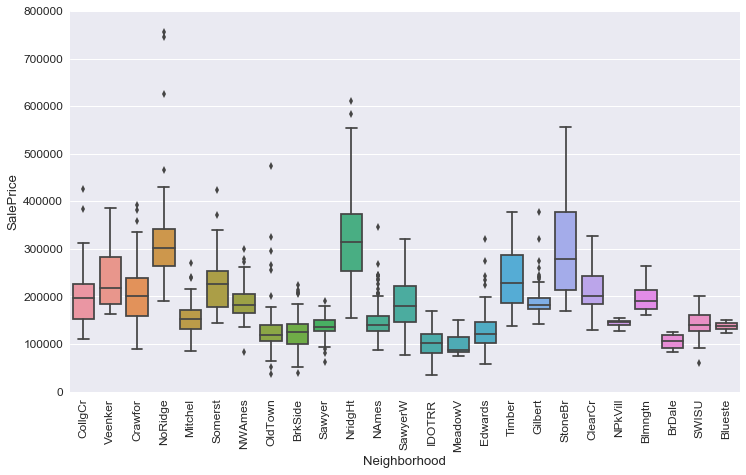

In [165]:
var = 'Neighborhood'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 7))
sns.set(font_scale=1.1)
sns.boxplot(x=var, y="SalePrice", data=data).axis(ymin=0, ymax=800000)
plt.xticks(rotation='vertical')
plt.savefig('neighbor_sale.png', bbox_inches='tight')
plt.show()

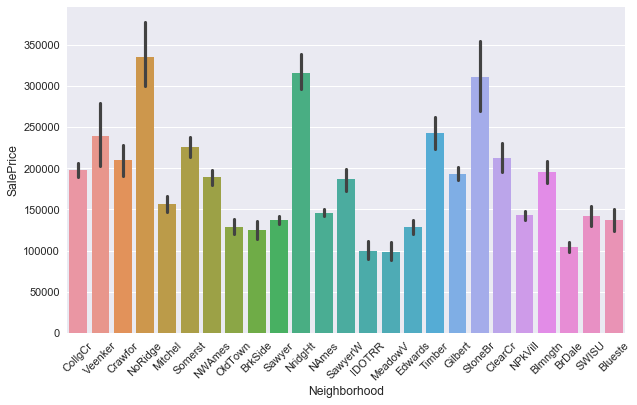

In [166]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(train['Neighborhood'],train['SalePrice'])
sns.set(font_scale=1.2)
plt.xlabel('Neighborhood')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.show()



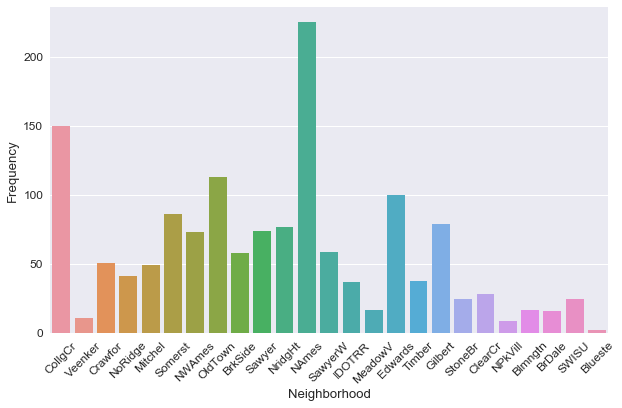

In [167]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(train['Neighborhood'])
sns.set(font_scale=1.2)
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()



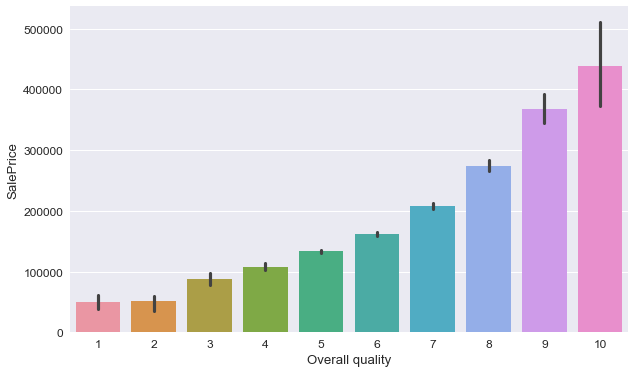

In [168]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(train['OverallQual'],train['SalePrice'])
sns.set(font_scale=1.2)
plt.xlabel('Overall quality')
plt.ylabel('SalePrice')
plt.show()





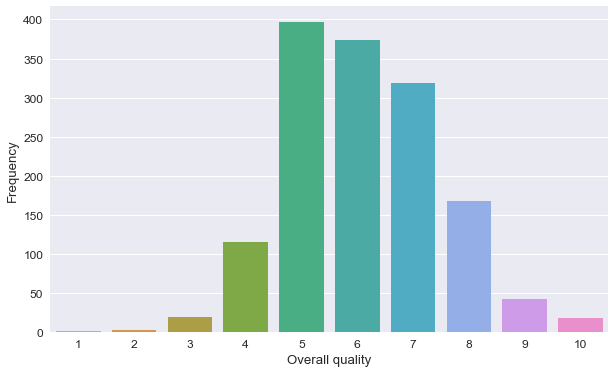

In [169]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(train['OverallQual'])
sns.set(font_scale=1.2)
plt.xlabel('Overall quality')
plt.ylabel('Frequency')
plt.show()




In [170]:
def get_feature_groups():
    """ Returns a list of numerical and categorical features,
    excluding SalePrice and Id. """
    # Numerical Features
    num_features = train.select_dtypes(include=['int64','float64']).columns
    num_features = num_features.drop(['Id','SalePrice']) # drop ID and SalePrice

    # Categorical Features
    cat_features = train.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

num_features, cat_features = get_feature_groups()

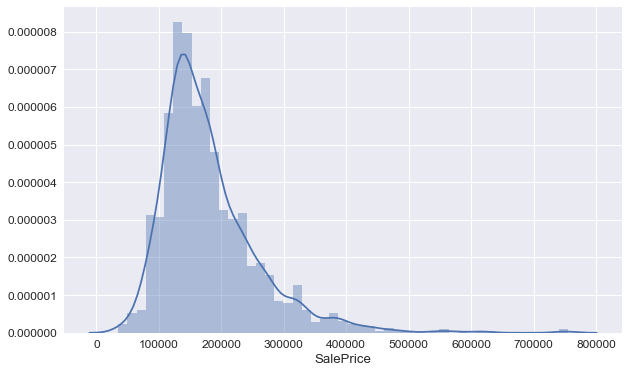

In [171]:
# Let's start with our dependent variable, SalePrice
plt.figure(figsize=(10,6))
sns.distplot(train.SalePrice)
plt.show()

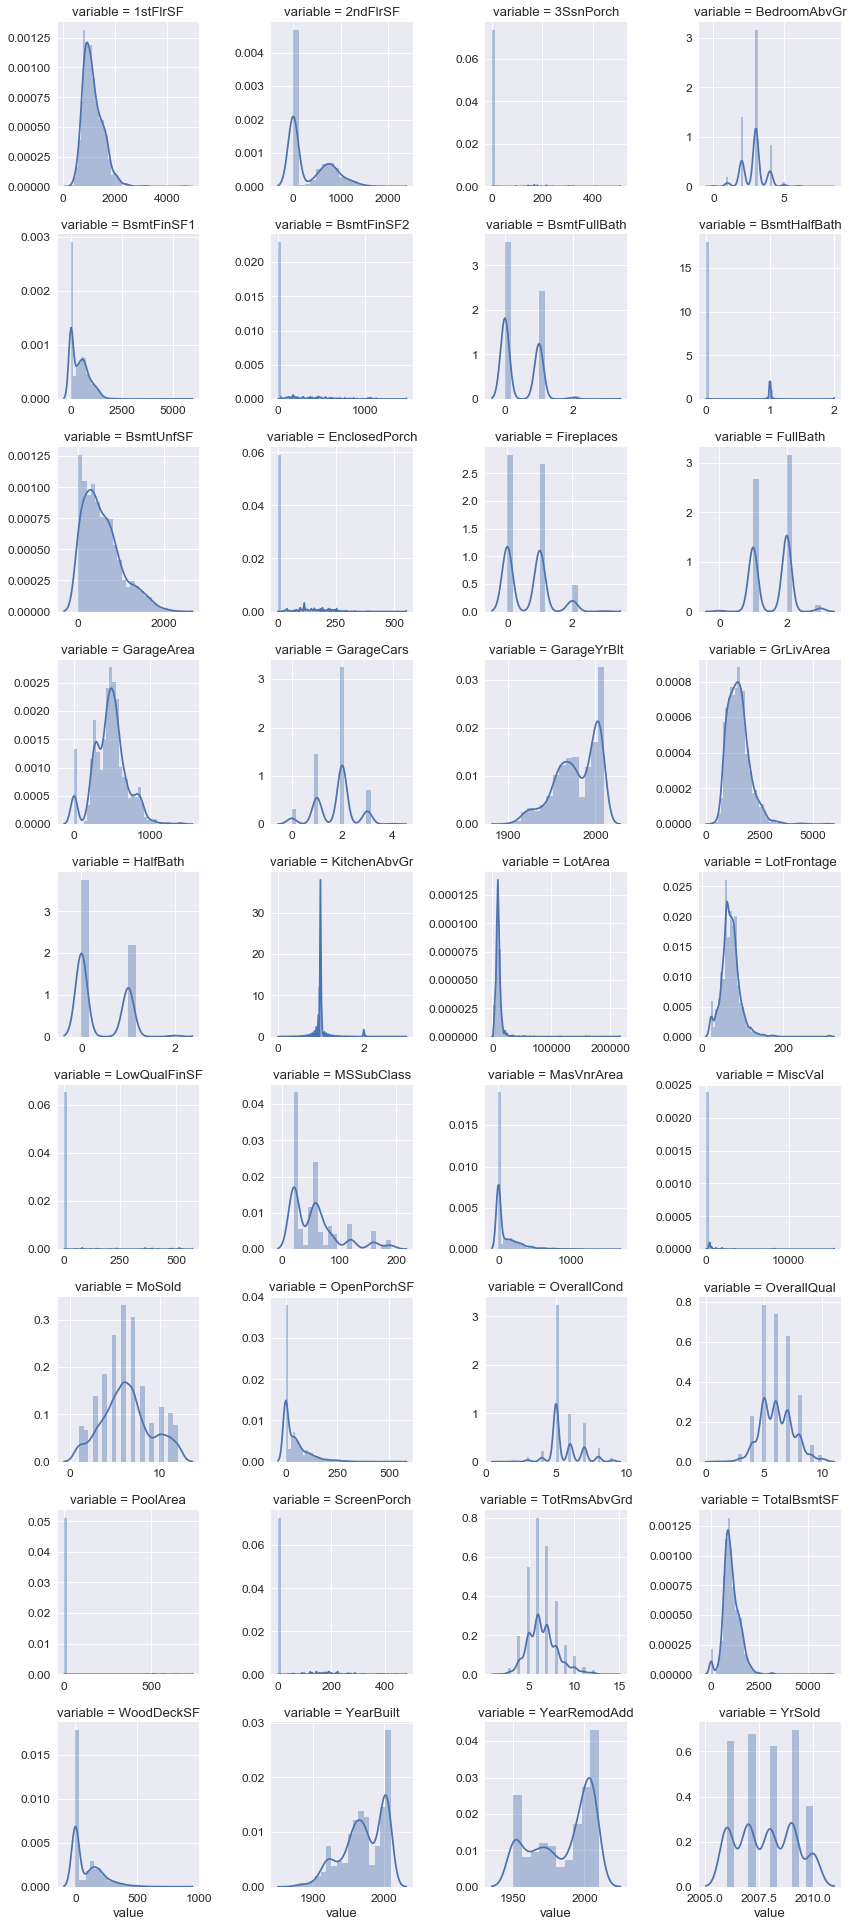

In [172]:
# Grid of distribution plots of all numerical features
f = pd.melt(train, value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

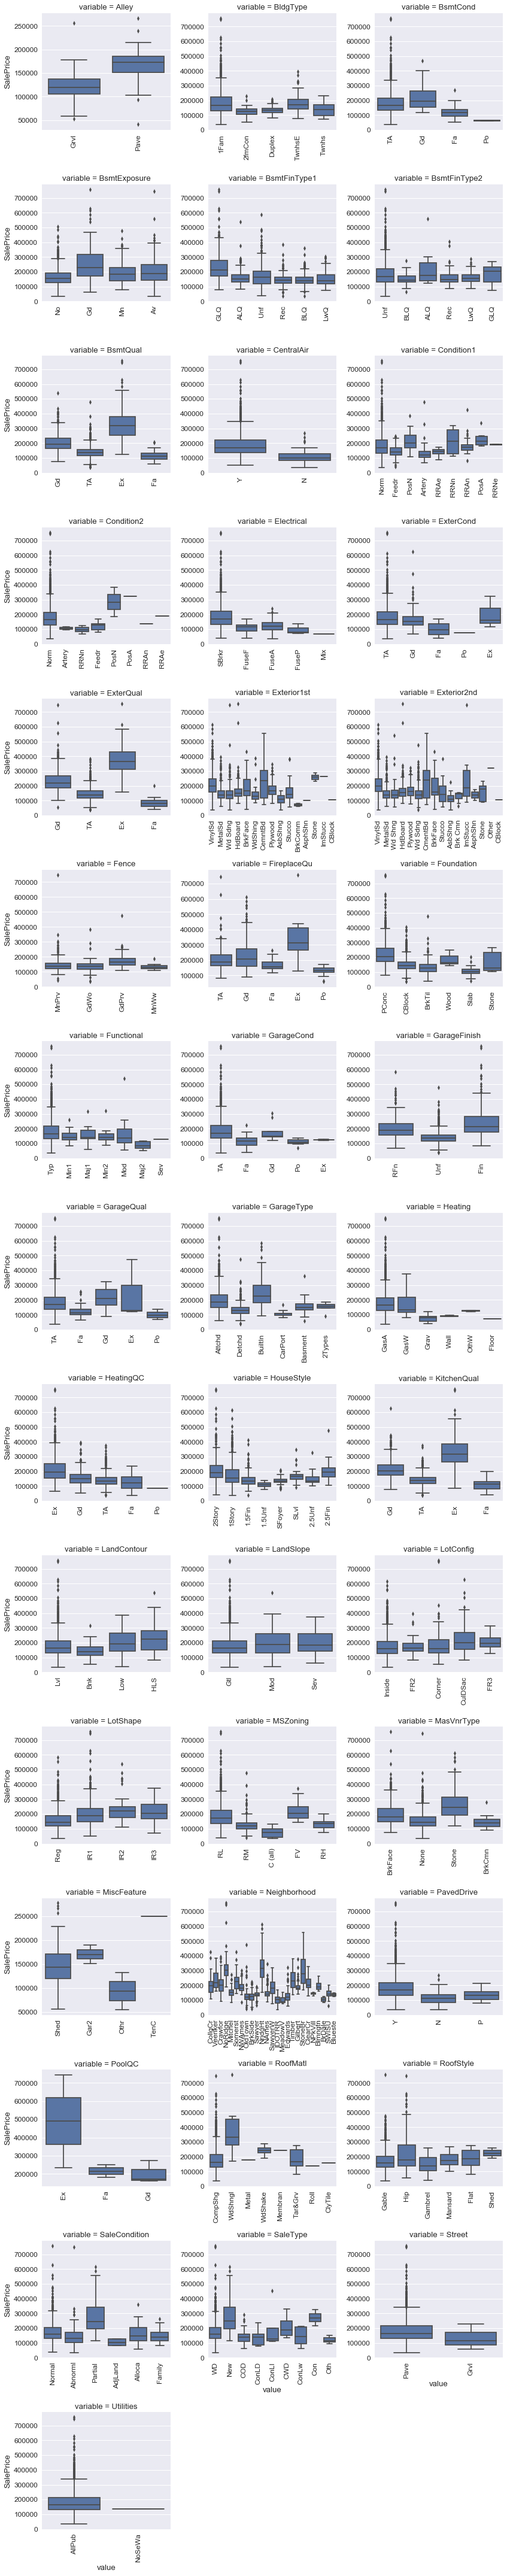

In [173]:
# Count plots of categorical features

f = pd.melt(train, id_vars=['SalePrice'], value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

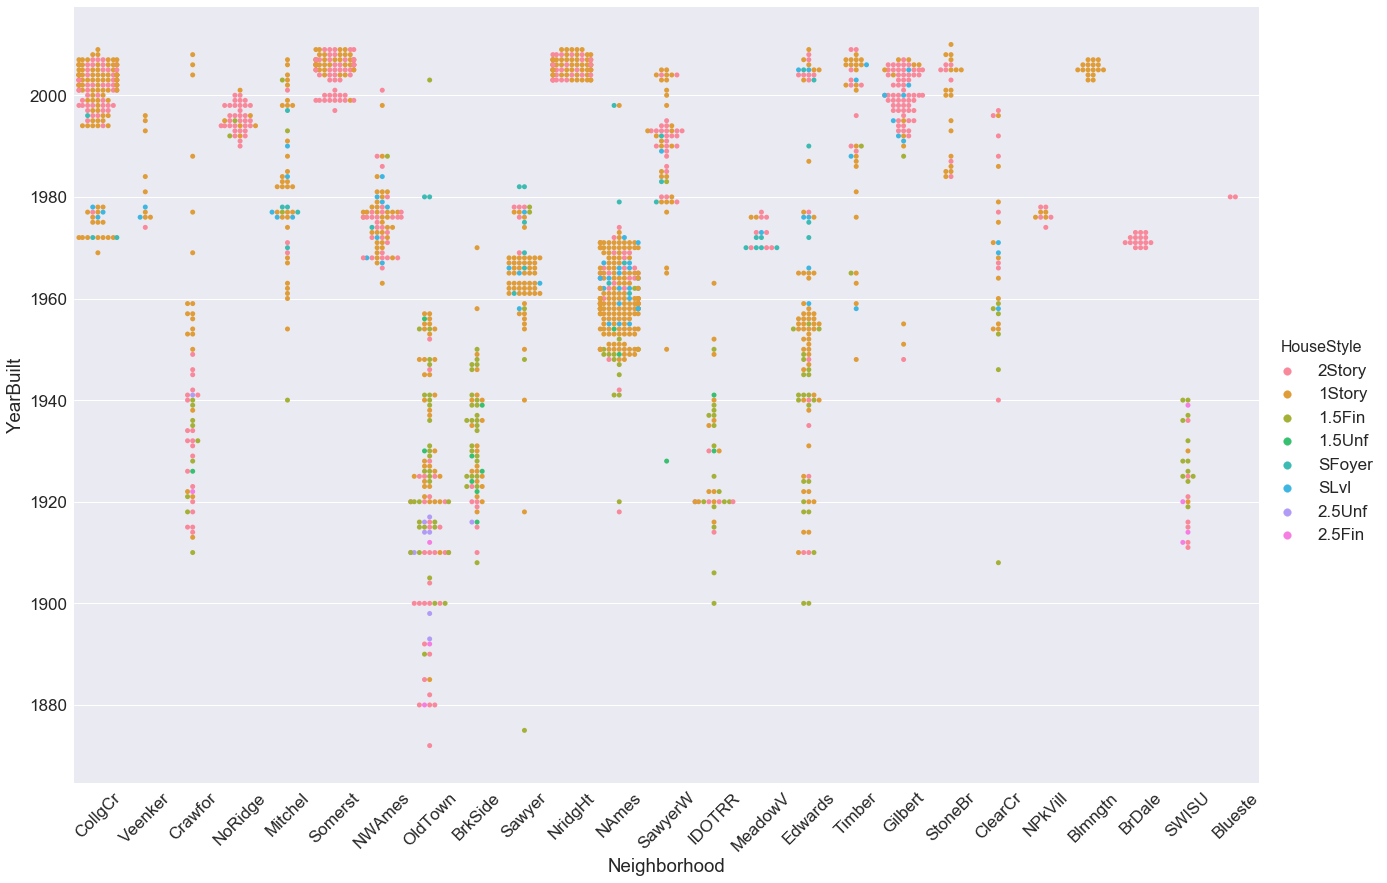

In [174]:
# The relationship between two categorical and one numerical variable
# Peering into the history of Ames, IA
sns.set(font_scale=1.7)
fig = sns.factorplot(x='Neighborhood', y='YearBuilt', hue='HouseStyle', data=train, kind='swarm', size=12, aspect=1.5)
ax = fig.axes[0][0]
plt.xticks(rotation=45)
#ax.set_yscale('log')
plt.savefig('year_neighbor_style.png', bbox_inches='tight')
plt.show()

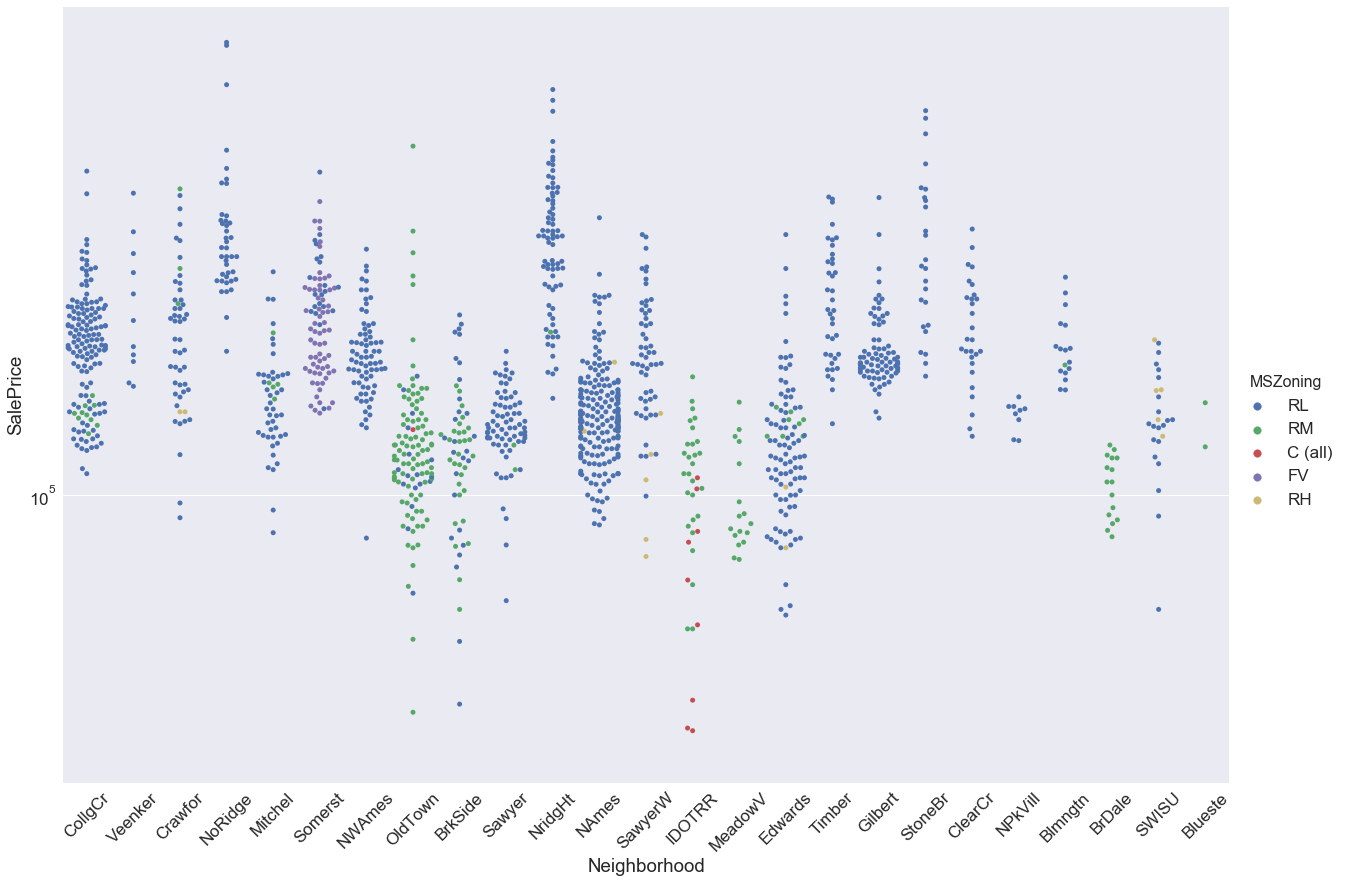

In [175]:
# Swarming Factorplot FTW
sns.set(font_scale=1.7)
fig = sns.factorplot(x='Neighborhood', y='SalePrice', hue='MSZoning', data=train, kind='swarm', size=12, aspect=1.5)
ax = fig.axes[0][0]
plt.xticks(rotation=45)
ax.set_yscale('log')
plt.savefig('sale_neighbor_zone.png', bbox_inches='tight')
plt.show()

# Listing Statistical properties

In [176]:
train[train.select_dtypes(exclude = ["object"]).columns].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [177]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

# Outliers detection

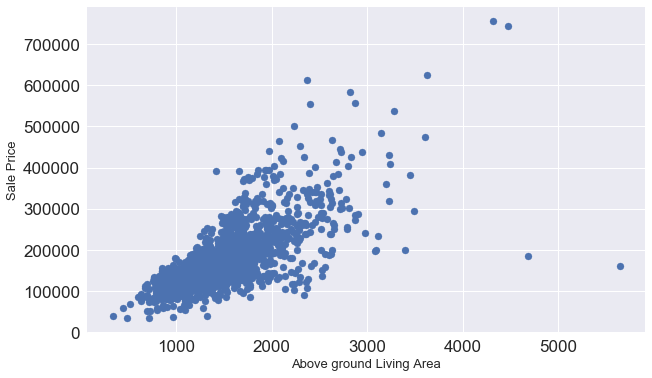

In [178]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('Sale Price', fontsize=13)
plt.xlabel('Above ground Living Area', fontsize=13)
plt.show()

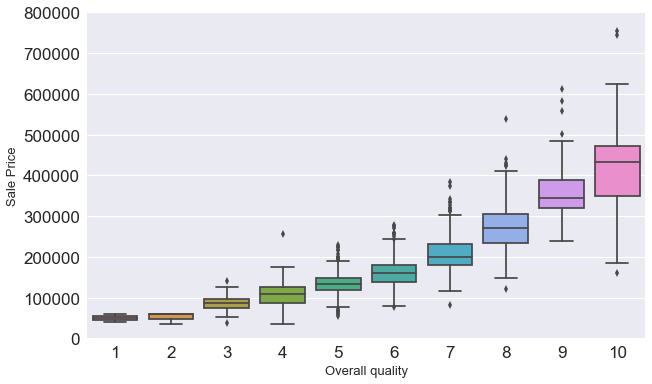

In [179]:
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=var, y="SalePrice", data=data).axis(ymin=0, ymax=800000)
plt.ylabel('Sale Price', fontsize=13)
plt.xlabel('Overall quality', fontsize=13)
plt.show()

In [180]:
# Percentile based outliers detection method which is based on inter quertile(IQR) range
def iqr_based_outliers(column):
    quartile_1, quartile_3 = np.percentile(column, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((column > upper_bound) | (column < lower_bound))

In [181]:
# Percentile based outliers detection
def percentile_based_outliers(column, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(column, [diff, 100 - diff])
    #return minval, maxval
    return np.where((column < minval) | (column > maxval))

In [182]:
# Median based outliers detection
def median_based_outliers(column, threshold=3.5):
    median_y = np.median(column)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in column])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in column]

    return np.where(np.abs(modified_z_scores) > threshold)



In [183]:
# standard deviation based outliers detection
def std_based_outliers(column, threshold=3):
    std = column.std()
    mean = column.mean()
    isOutlier = []
    for val in column:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return np.where(isOutlier)



In [184]:
# Majority vote based outliers detection

from itertools import chain

def MajorityVote_based_outliers(column):
    a = iqr_based_outliers(column)
    b = percentile_based_outliers(column)
    c = median_based_outliers(column)
    d = std_based_outliers(column)
    temp = a + b + c + d
    temp = list(chain.from_iterable(temp))
    final = []
    for i in np.unique(temp):
        if temp.count(i) >= 3:
            final.append(i)
    return final

# Data correlation 

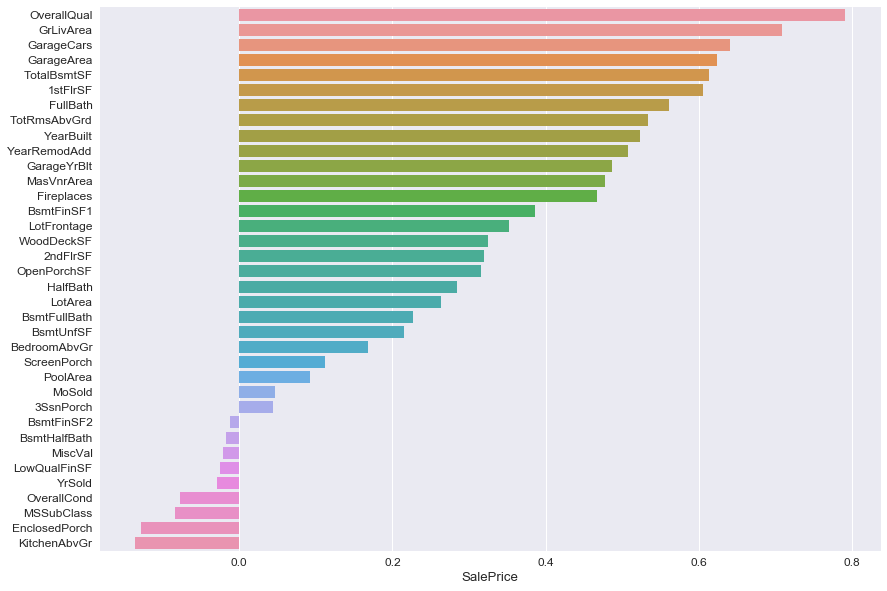

In [185]:
# Feature sorted by correlation to SalePrice, from positive to negative
corr = train[['SalePrice'] + num_features].corr()
corr = corr.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(14,10))
sns.set(font_scale=1.2)
sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h')
plt.savefig('data_cor.png', bbox_inches='tight')
plt.show()

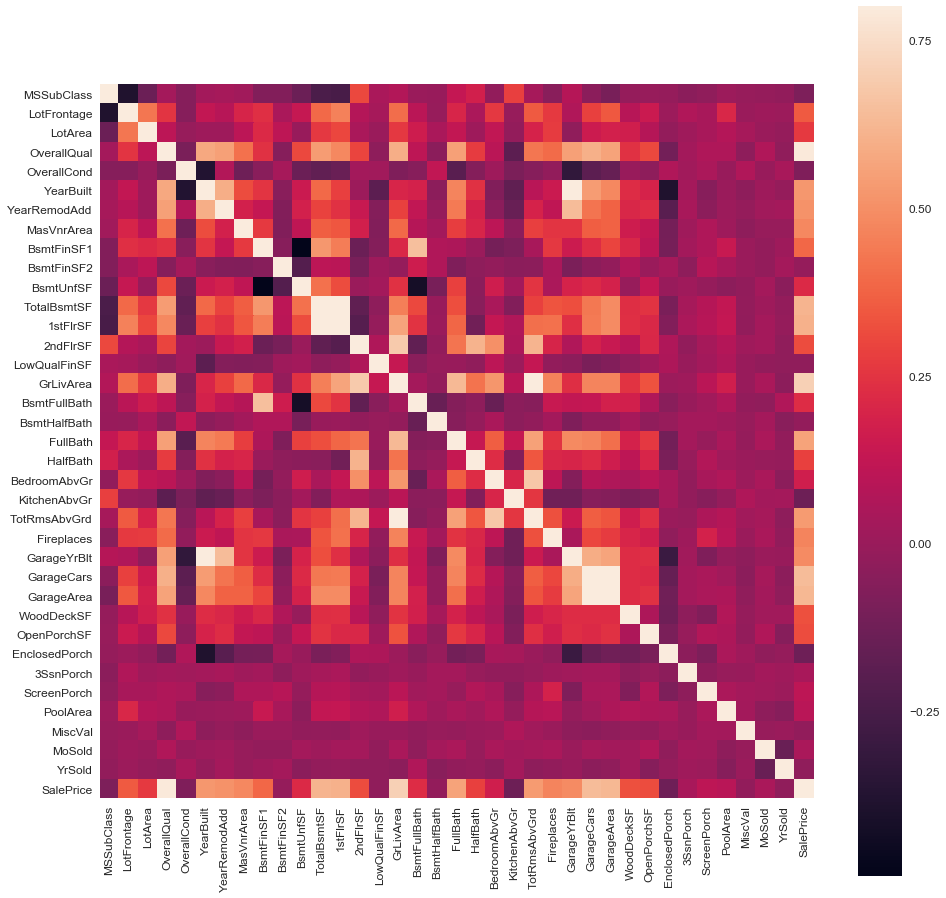

In [186]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

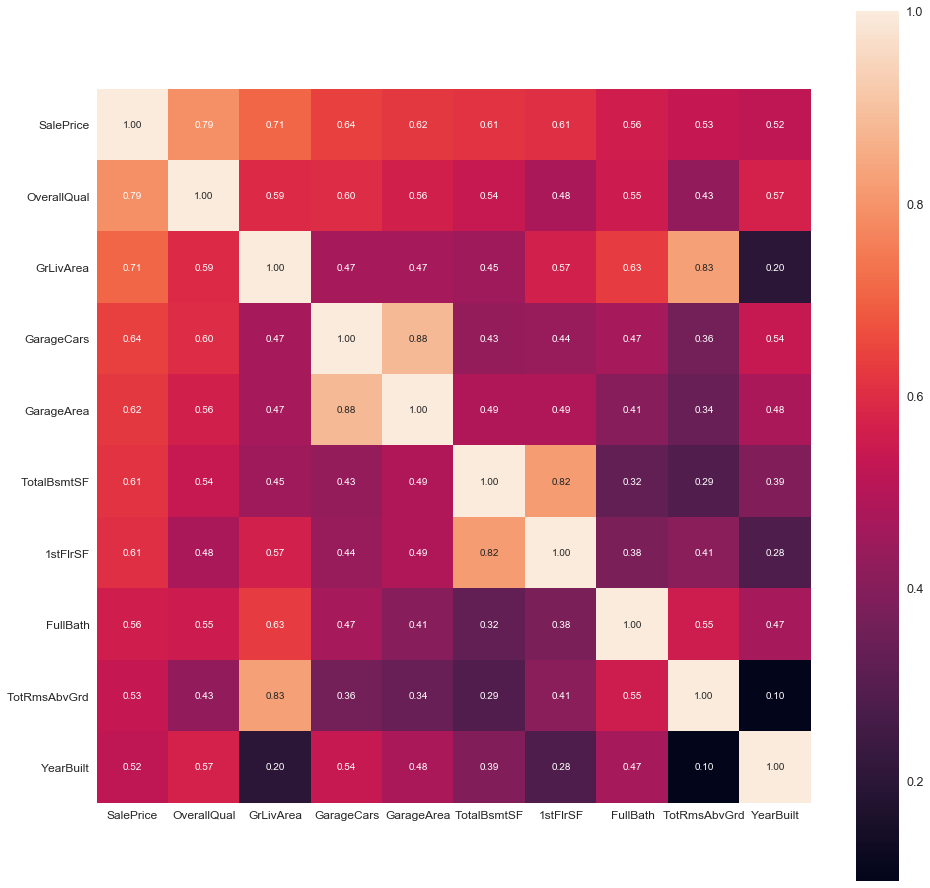

In [187]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice').index
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(16, 16))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.savefig('cor_mat.png', bbox_inches='tight')

In [188]:
# We can see that there are several highly correlated features.
# They give almost the same information so multicollinearity really occurs.
# 'GarageArea' and 'GarageCars' ----> .89
# Keep 'GarageCars' since its correlation with 'SalePrice' is higher
# 'TotalBsmtSF' and '1stFlrSF' ----> .8
# Keep 'TotalBsmtSF' 
# 'TotRmsAbvGrd' and 'GrLivArea' ----> .83
# Keep 'GrLivArea' since its correlation with 'SalePrice' is higher

train.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd' ], axis = 1, inplace=True)
test.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd' ], axis = 1, inplace=True)

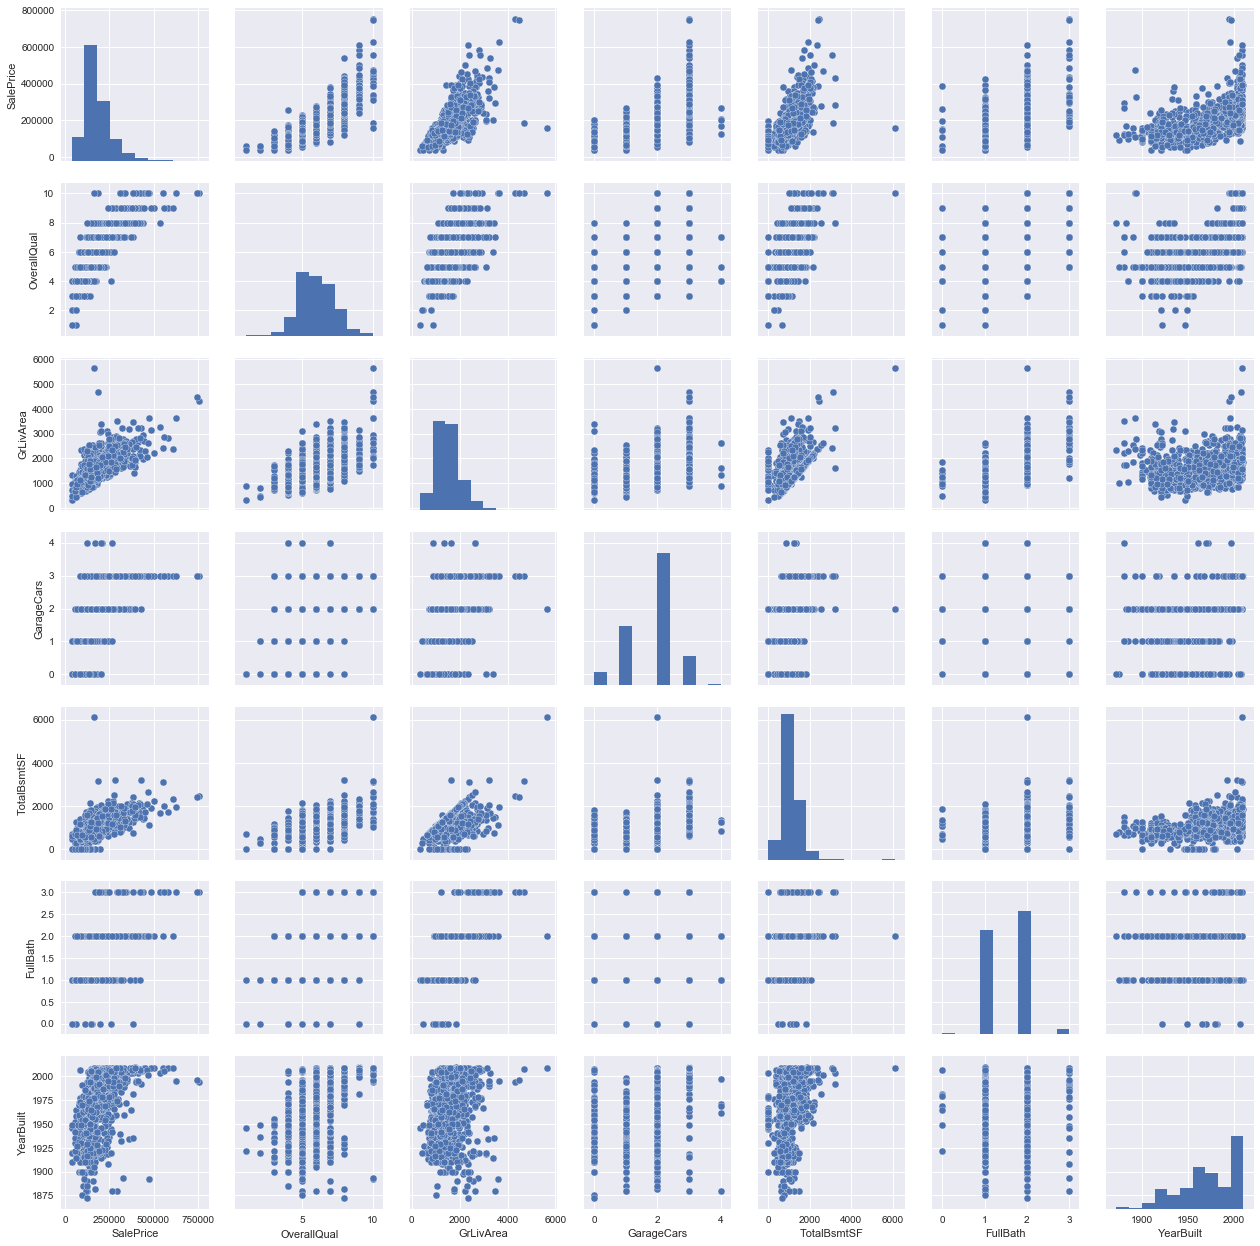

In [189]:
# Scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
        'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show()

# Target variable distribution

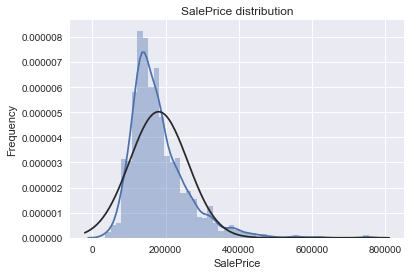

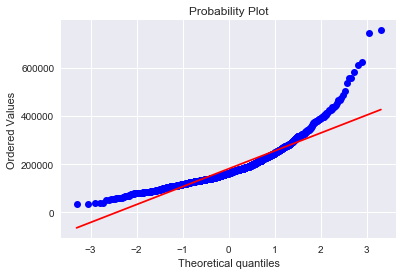

In [190]:
#histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm)
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.savefig('target_dist1.png', bbox_inches='tight')
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.savefig('target_dist2.png', bbox_inches='tight')

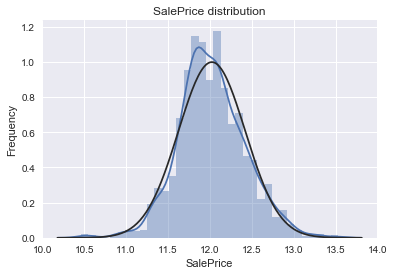

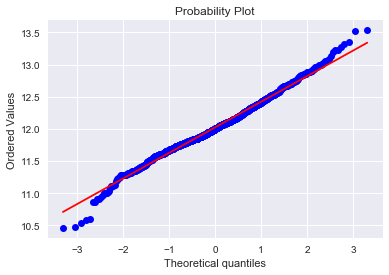

In [191]:
# The target variable is right skewed.
# We will try to transform target variable to make it normally distributed.
# function log1p applies log(1+x) to all elements of the target variable column
train["SalePrice"] = np.log1p(train["SalePrice"])

# Let's check the new distribution
# histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm)
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.savefig('target_dist1_after.png', bbox_inches='tight')
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.savefig('target_dist2_after.png', bbox_inches='tight')

# Finding missing values

In [192]:
# Concatenate the train and test data
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
data_all = pd.concat((train,test)).reset_index(drop = True)
data_all.drop(['SalePrice'], axis=1, inplace=True)
total = data_all.isnull().sum().sort_values(ascending=False)
percent = (data_all.isnull().sum()/len(data_all)).sort_values(ascending=False)
missing_data_all = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_all.head(30)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471
GarageCond,159,0.054471


# Missing values imputation

In [193]:
# Alley : according to data description ----> NA means "no alley access"
data_all.loc[:, "Alley"] = data_all.loc[:, "Alley"].fillna("None")

# Functional : according to data description ----> NA means typical
data_all.loc[:, "Functional"] = data_all.loc[:, "Functional"].fillna("Typ")

# Fence : according to data description ----> NA means "no fence"
data_all.loc[:, "Fence"] = data_all.loc[:, "Fence"].fillna("No")

# BsmtQual etc : according to data description ----> NA for basement features is "no basement"
for column in ("BsmtFullBath", "BsmtHalfBath", "BsmtUnfSF", "BsmtFinSF1", 
               "BsmtFinSF2", "TotalBsmtSF"):
    data_all[column] = data_all[column].fillna(0)
        
for column in ("BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"):
    data_all[column] = data_all[column].fillna('No')
    
# FireplaceQu : according to data description ----> NA means "no fireplace"
data_all.loc[:, "FireplaceQu"] = data_all.loc[:, "FireplaceQu"].fillna("No")
data_all.loc[:, "Fireplaces"] = data_all.loc[:, "Fireplaces"].fillna(0)

# Functional : according to data description ----> NA means typical
data_all.loc[:, "Functional"] = data_all.loc[:, "Functional"].fillna("Typ")

# GarageType etc : according to data description ----> NA for garage features is "no garage"
for column in ("GarageCars", "GarageYrBlt"):
    data_all[column] = data_all[column].fillna(0)
        
for column in ("GarageType", "GarageFinish", "GarageQual", "GarageCond"):
    data_all[column] = data_all[column].fillna('No')

# MiscFeature : according to data description ----> NA means "no misc feature"
data_all.loc[:, "MiscFeature"] = data_all.loc[:, "MiscFeature"].fillna("No")
data_all.loc[:, "MiscVal"] = data_all.loc[:, "MiscVal"].fillna(0)
 

# PoolQC : according to data description ----> NA means "no pool"
data_all.loc[:, "PoolQC"] = data_all.loc[:, "PoolQC"].fillna("No")
data_all.loc[:, "PoolArea"] = data_all.loc[:, "PoolArea"].fillna(0)
    
for column in ("BedroomAbvGr", "CentralAir", "Condition1", "Condition2", "Electrical","EnclosedPorch",
               "ExterCond", "ExterQual", "Exterior1st", "Exterior2nd", "HalfBath",  "HeatingQC",
               "KitchenAbvGr", "KitchenQual", "LotFrontage", "LotShape", "MasVnrType", "MasVnrArea",
               "MSZoning", "OpenPorchSF", "PavedDrive", "SaleCondition", "SaleType", "ScreenPorch",
               "Utilities", "WoodDeckSF"):
    data_all[column] = data_all[column].fillna(data_all[column].mode()[0])
    

In [194]:
# Some numerical features are in fact categories

# MSSubClass=The building class
data_all['MSSubClass'] = data_all['MSSubClass'].apply(str)

# Changing OverallCond into a categorical variable
data_all['OverallCond'] = data_all['OverallCond'].astype(str)

# YearBuilt (or remodeled) makes sense (old houses are worth less)
# Year and month sold are transformed into categorical features
data_all['YrSold'] = data_all['YrSold'].astype(str)
data_all['MoSold'] = data_all['MoSold'].astype(str)

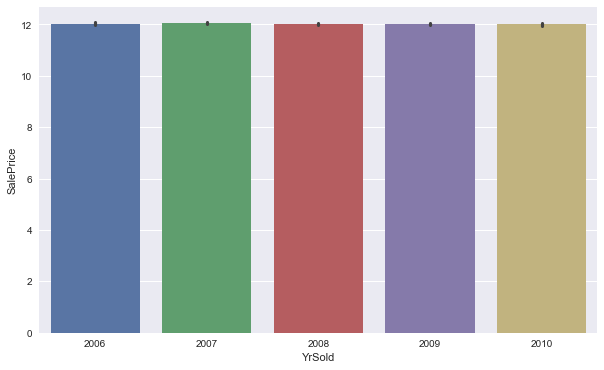

In [195]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data_all['YrSold'],y_train)
plt.xlabel('YrSold')
plt.ylabel('SalePrice')
plt.show()



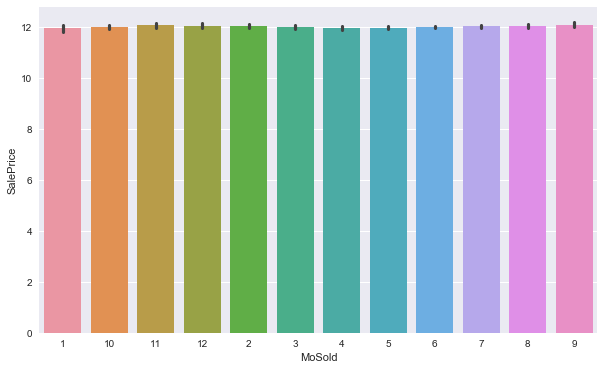

In [196]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data_all['MoSold'],y_train)
plt.xlabel('MoSold')
plt.ylabel('SalePrice')
plt.show()


In [197]:
# Encoding some categorical features as ordered numbers 
from sklearn.preprocessing import LabelEncoder
columns = ("Alley", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtQual",
          "ExterCond", "ExterQual", "FireplaceQu", "Functional", "GarageCond", "GarageQual",
          "HeatingQC", "KitchenQual", "LandSlope", "LotShape", "PavedDrive", "PoolQC",
          "Street", "Utilities" )
# Apply LabelEncoder to categorical features
for col in columns:
    label = LabelEncoder() 
    label.fit(list(data_all[col].values)) 
    data_all[col] = label.transform(list(data_all[col].values))

In [198]:
# Checking remaining missing data if any
total = data_all.isnull().sum().sort_values(ascending=False)
percent = (data_all.isnull().sum()/len(data_all)).sort_values(ascending=False)
missing_data_all = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_all.head(3)

,Total,Percent
YrSold,0,0.0
Foundation,0,0.0
ExterCond,0,0.0


# Skewed features

In [199]:
numeric_features = data_all.dtypes[data_all.dtypes != "object"].index
# Check the skew of all numerical features
skewed_features = data_all[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_features})
skewness.head(10)


,Skew
Utilities,54.000003
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
LandSlope,4.975157
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891


In [200]:
# log transform skewed numeric features (threshold = 0.75)
skewed_features = skewed_features[np.abs(skewed_features) > 0.75]
skewed_features = skewed_features.index
data_all[skewed_features] = np.log1p(data_all[skewed_features])


In [201]:
# Getting dummy categorical features
data_all = pd.get_dummies(data_all)

In [202]:
train = data_all[:ntrain]
test = data_all[ntrain:]

In [203]:
train.shape

(1460, 264)

In [204]:
dataset_full = train.copy()
dataset_full['SalePrice'] = y_train
dataset_full.to_csv('dataset_full.csv', index=False)
test.to_csv('test_data.csv', index=False)

# Feature importance with random forest

In [205]:
# Feature importance with random forest
from sklearn.ensemble import RandomForestRegressor
X = train
y = y_train
features = X.columns
forest_model = RandomForestRegressor(n_estimators = 1000, random_state = 101, n_jobs = -1)
forest_model.fit(X, y)
importances = forest_model.feature_importances_
indices = np.argsort(importances)[::-1][:30]
for i in range(len(indices)):
    print ("%2d) %-*s %f" % (i + 1, 20, features[indices[i]],importances[indices[i]]))



 1) OverallQual          0.556070
 2) GrLivArea            0.118518
 3) TotalBsmtSF          0.057370
 4) GarageCars           0.051725
 5) BsmtFinSF1           0.021964
 6) YearBuilt            0.016733
 7) LotArea              0.014620
 8) GarageYrBlt          0.010112
 9) YearRemodAdd         0.009328
10) CentralAir_Y         0.006921
11) 2ndFlrSF             0.006584
12) CentralAir_N         0.006333
13) Fireplaces           0.005732
14) BsmtUnfSF            0.005639
15) LotFrontage          0.005308
16) OpenPorchSF          0.004284
17) MSZoning_RM          0.004158
18) GarageType_Detchd    0.003914
19) MSZoning_C (all)     0.003769
20) WoodDeckSF           0.003179
21) BsmtQual             0.003081
22) BsmtFinType1         0.002827
23) MasVnrArea           0.002710
24) OverallCond_3        0.002605
25) GarageType_Attchd    0.002459
26) KitchenQual          0.002367
27) ExterCond            0.002229
28) FullBath             0.002203
29) EnclosedPorch        0.001879
30) BedroomAbv

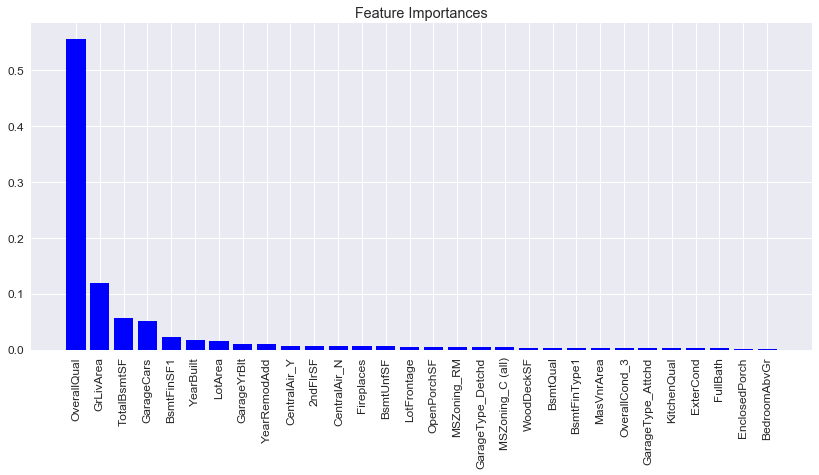

In [226]:
# Plot feature importances
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(14, 6))
plt.title('Feature Importances')
plt.bar(range(len(indices)), importances[indices], color='b', align='center')
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=90)
plt.savefig('feature_forest.png', bbox_inches='tight')
plt.show()


In [207]:
top_features = []
for i in range(len(indices)):
     top_features.append(features[indices[i]])

In [208]:
dataset_forest = train.loc[:, top_features]
dataset_forest['SalePrice'] = y_train
dataset_forest.to_csv('dataset_forest.csv', index=False)

# Principal Component Analysis

In [209]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train)
dataset_pca = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


In [210]:
# Using just these two components will explain for more than 93%  of the dataset information 
pca.explained_variance_ratio_



array([0.78446636, 0.15987999])

In [229]:
dataset_pca.head()

,principal component 1,principal component 2,SalePrice
0,-36.671951,0.932988,12.247699
1,-0.045073,-10.202268,12.109016
2,-34.465507,1.005722,12.317171
3,56.576766,13.778923,11.849405
4,-32.865533,-0.222542,12.429220


In [212]:
dataset_pca['SalePrice'] = y_train
dataset_pca.to_csv('dataset_pca.csv', index=False)



# Stability Selection via Randomized Lasso

In [213]:
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [214]:
# First extract the target variable which is our House prices
y = y_train

# Drop price from the house dataframe and create a matrix out of the house data
X = train
X = X.as_matrix()

# Store the column/feature names into a list "colnames"
features = train.columns


In [215]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [216]:
# Finally let's run our Selection Stability method with Randomized Lasso
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, y)
ranks["rlasso/Stability"] = ranking(np.abs(rlasso.scores_), features)


# Recursive Feature Elimination ( RFE )

In [217]:
# Construct our Linear Regression model
lr = LinearRegression(normalize=True)
lr.fit(X,y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =0 )
rfe.fit(X,y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), features, order=-1)

# Linear Model Feature Ranking

In [218]:
# Using Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X,y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), features)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), features)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), features)

# Random Forest Feature Ranking

In [219]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=0)
rf.fit(X,y)
ranks["RF"] = ranking(rf.feature_importances_, features)

# Creating the Feature Ranking Matrix

In [220]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in features:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)

In [221]:
RF_dataframe = pd.DataFrame.from_dict(ranks["RF"], orient='index', columns = ['RF'])
Lasso_dataframe = pd.DataFrame.from_dict(ranks["Lasso"], orient='index', columns = ['Lasso'])
RFE_dataframe = pd.DataFrame.from_dict(ranks["RFE"], orient='index', columns = ['RFE'])
rlassoStability_dataframe = pd.DataFrame.from_dict(ranks["rlasso/Stability"], orient='index', columns = ['rlasso/Stability'])
LinReg_dataframe = pd.DataFrame.from_dict(ranks["LinReg"], orient='index', columns = ['LinReg'])
Ridge_dataframe = pd.DataFrame.from_dict(ranks["Ridge"], orient='index', columns = ['Ridge'])
Mean_dataframe = pd.DataFrame.from_dict(r, orient='index', columns = ['Mean'])


In [222]:
dataframes =[RF_dataframe, Lasso_dataframe, RFE_dataframe, rlassoStability_dataframe, 
             LinReg_dataframe, Ridge_dataframe, Mean_dataframe]
feature_ranking_matrix = pd.concat(dataframes, axis=1, join_axes=[RF_dataframe.index])

In [223]:
feature_ranking_matrix.head()

,RF,Lasso,RFE,rlasso/Stability,LinReg,Ridge,Mean
2ndFlrSF,0.01,0.06,0.05,0.0,0.0,0.00,0.02
3SsnPorch,0.00,0.00,0.02,0.0,0.0,0.02,0.01
Alley,0.00,0.00,0.11,0.0,0.0,0.03,0.02
BedroomAbvGr,0.00,0.00,0.08,0.0,0.0,0.02,0.02
BsmtCond,0.00,0.00,0.10,0.0,0.0,0.05,0.03


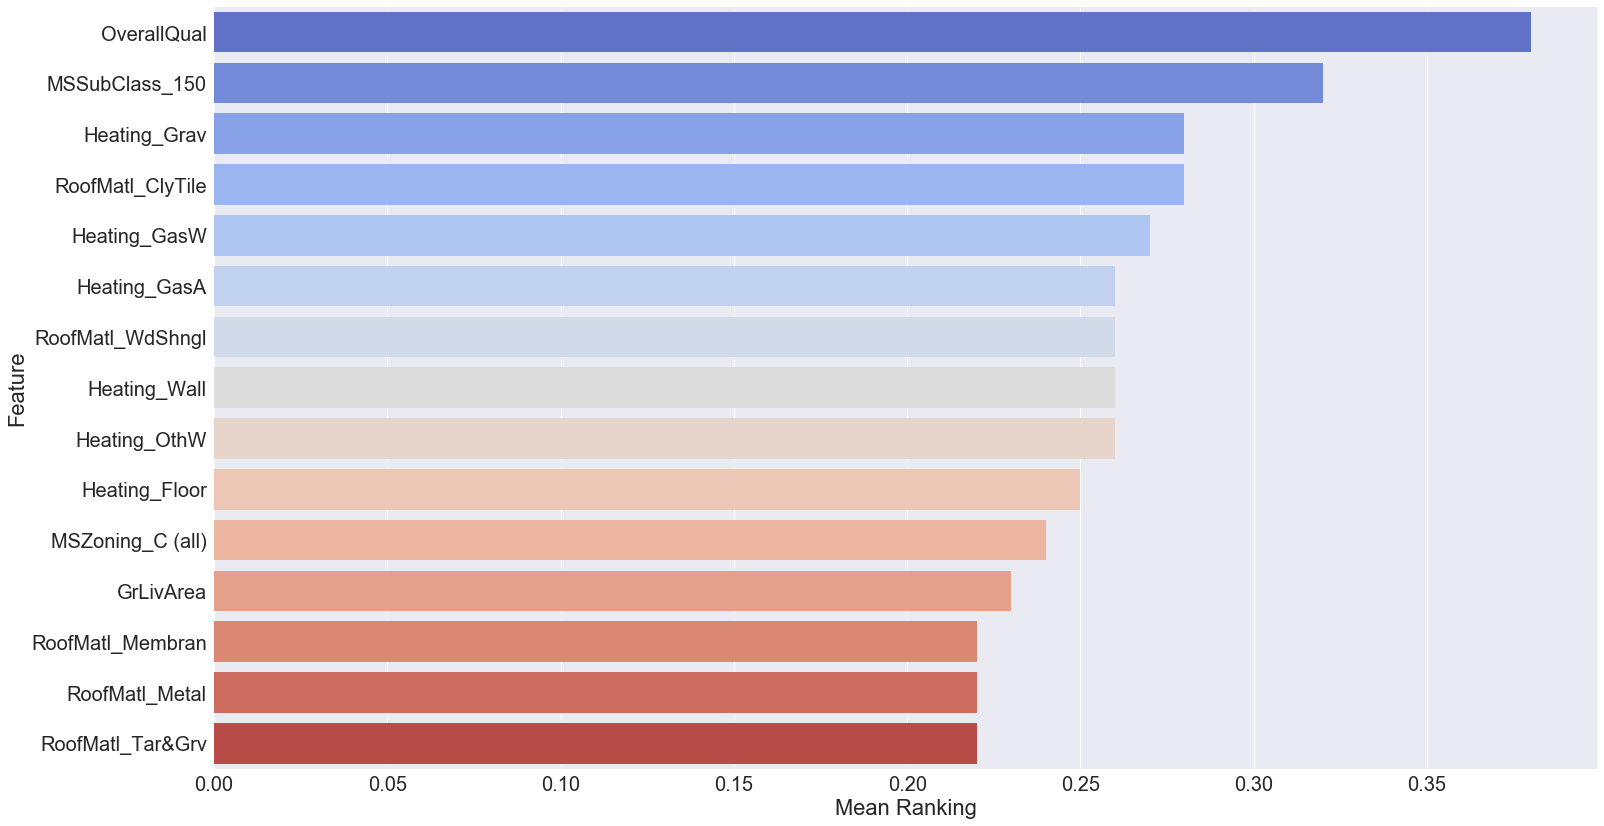

In [227]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False).reset_index(drop=True)

# Let's plot the ranking of the features
sns.set(font_scale=2)
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot.head(15), kind="bar", 
               size=12, aspect=1.9, palette='coolwarm')

plt.savefig('feature_ranking.png', bbox_inches='tight')
plt.show()

In [225]:
top_features = []
n_features = 15
for i in range(n_features):
    top_features.append(meanplot.Feature[i])
dataset_MeanRanking = train.loc[:, top_features]
dataset_MeanRanking['SalePrice'] = y_train
dataset_MeanRanking.to_csv('dataset_MeanRanking.csv', index=False)